<a href="https://colab.research.google.com/github/BiswajitDeori/BB.github.io/blob/main/brain_tumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!mkdir ~/.kaggle


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              237KB  2021-11-10 18:11:20          15377  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           9356  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           4176  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-10-22 10:48:21           3418  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Jo

In [ ]:
!kaggle datasets download -d mateuszbuda/lgg-mri-segmentation

 99% 705M/714M [00:05<00:00, 130MB/s]
100% 714M/714M [00:05<00:00, 125MB/s]


In [ ]:
!unzip lgg-mri-segmentation

Streaming output truncated to the last 5000 lines.
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7294_19890104/TCGA_DU_7294_19890104_9_mask.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_1.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_10.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_10_mask.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_11.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_11_mask.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_12.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_12_mask.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_13.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_1

In [ ]:
import glob
import time
import numpy as np
import pandas as pd
from tqdm import tqdm

import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from sklearn.model_selection import train_test_split

In [ ]:

ROOT_PATH = 'lgg-mri-segmentation/kaggle_3m/'
mask_files = glob.glob(ROOT_PATH+ '*/*_mask*')
image_files = [file.replace('_mask', '') for file in mask_files]

In [ ]:
image_files

['lgg-mri-segmentation/kaggle_3m/TCGA_DU_7309_19960831/TCGA_DU_7309_19960831_13.tif',
 'lgg-mri-segmentation/kaggle_3m/TCGA_DU_7309_19960831/TCGA_DU_7309_19960831_23.tif',
 'lgg-mri-segmentation/kaggle_3m/TCGA_DU_7309_19960831/TCGA_DU_7309_19960831_5.tif',
 'lgg-mri-segmentation/kaggle_3m/TCGA_DU_7309_19960831/TCGA_DU_7309_19960831_26.tif',
 'lgg-mri-segmentation/kaggle_3m/TCGA_DU_7309_19960831/TCGA_DU_7309_19960831_17.tif',
 'lgg-mri-segmentation/kaggle_3m/TCGA_DU_7309_19960831/TCGA_DU_7309_19960831_39.tif',
 'lgg-mri-segmentation/kaggle_3m/TCGA_DU_7309_19960831/TCGA_DU_7309_19960831_3.tif',
 'lgg-mri-segmentation/kaggle_3m/TCGA_DU_7309_19960831/TCGA_DU_7309_19960831_33.tif',
 'lgg-mri-segmentation/kaggle_3m/TCGA_DU_7309_19960831/TCGA_DU_7309_19960831_14.tif',
 'lgg-mri-segmentation/kaggle_3m/TCGA_DU_7309_19960831/TCGA_DU_7309_19960831_21.tif',
 'lgg-mri-segmentation/kaggle_3m/TCGA_DU_7309_19960831/TCGA_DU_7309_19960831_19.tif',
 'lgg-mri-segmentation/kaggle_3m/TCGA_DU_7309_19960831/T

In [ ]:
def diagnosis(mask_path):
  return 1 if np.max(cv2.imread(mask_path)) > 0 else 0



df=pd.DataFrame({"image_path":image_files,"mask_path":mask_files,"mask":[diagnosis(x) for x in mask_files]})




In [ ]:
df.head()

,image_path,mask_path,mask
0,lgg-mri-segmentation/kaggle_3m/TCGA_DU_7309_19...,lgg-mri-segmentation/kaggle_3m/TCGA_DU_7309_19...,0
1,lgg-mri-segmentation/kaggle_3m/TCGA_DU_7309_19...,lgg-mri-segmentation/kaggle_3m/TCGA_DU_7309_19...,1
2,lgg-mri-segmentation/kaggle_3m/TCGA_DU_7309_19...,lgg-mri-segmentation/kaggle_3m/TCGA_DU_7309_19...,0
3,lgg-mri-segmentation/kaggle_3m/TCGA_DU_7309_19...,lgg-mri-segmentation/kaggle_3m/TCGA_DU_7309_19...,1
4,lgg-mri-segmentation/kaggle_3m/TCGA_DU_7309_19...,lgg-mri-segmentation/kaggle_3m/TCGA_DU_7309_19...,0


In [ ]:
ff=df["mask"].value_counts()



In [ ]:
ff[0]

2556

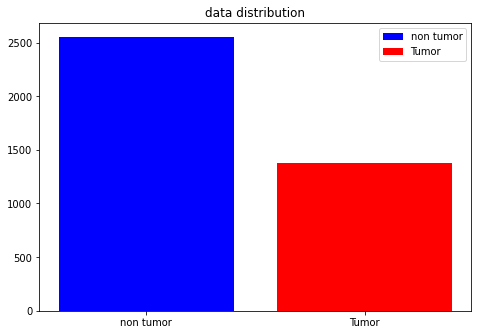

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ["non tumor",'Tumor']
ax.bar(langs[0],ff[0],color='b')
ax.bar(langs[1],ff[1],color='r')
ax.set_title("data distribution")
ax.legend(langs)
plt.show()

In [ ]:
df['mask'] = df['mask'].apply(lambda x: str(x))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  3929 non-null   object
 1   mask_path   3929 non-null   object
 2   mask        3929 non-null   object
dtypes: object(3)
memory usage: 92.2+ KB


In [ ]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.15)
df_train, df_val = train_test_split(df_train, test_size=0.15)
print(df_train.values.shape,df_val.values.shape,df_test.values.shape)


(2838, 3) (501, 3) (590, 3)


(-0.5, 2604.5, 520.5, -0.5)

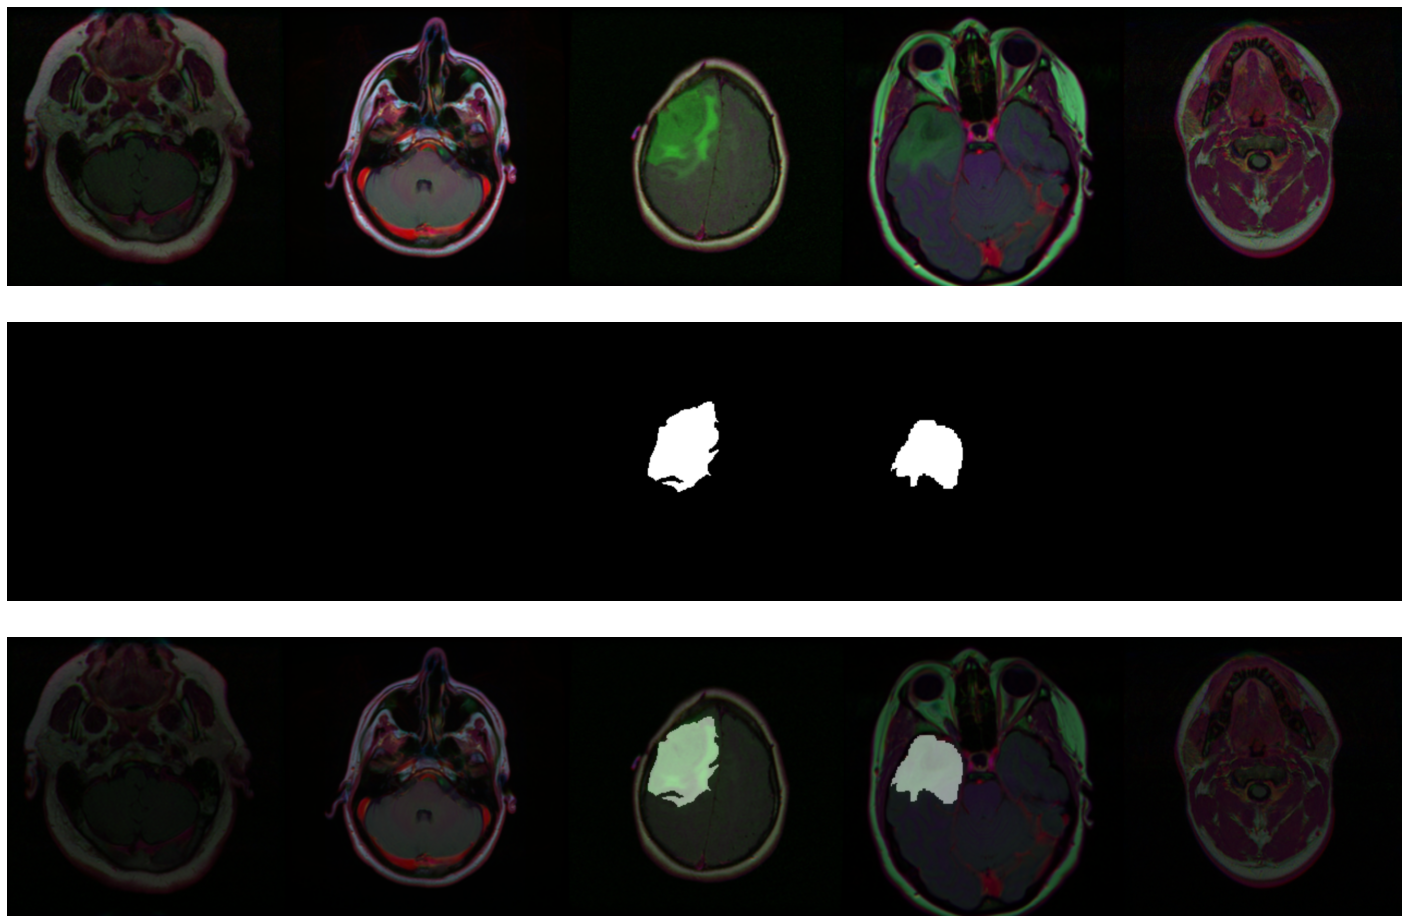

In [ ]:
IMG_SIZE = 521

images = []
masks = []

sample_img=df.sample(5).values

sample_img.shape


for data in sample_img:
  img=cv2.resize(cv2.imread(data[0]),(521,521))
  mask=cv2.resize(cv2.imread(data[1]),(521,521))
  images.append(img)
  masks.append(mask)


images = np.hstack(np.array(images))
masks = np.hstack(np.array(masks))

fig = plt.figure(figsize=(25,25))
grid = ImageGrid(fig, 111, nrows_ncols=(3,1), axes_pad=0.5)


grid[0].imshow(images)

grid[0].axis('off')

grid[1].imshow(masks)

grid[1].axis('off')
grid[2].imshow(images)
grid[2].imshow(masks, alpha=0.5)

grid[2].axis('off')



In [ ]:
from tqdm import tqdm_notebook, tnrange
from itertools import chain
from skimage.io import imread, imshow, concatenate_images
from skimage.transform import resize
from skimage.morphology import label

import tensorflow as tf
from skimage.color import rgb2gray
from tensorflow.keras import Input
from tensorflow.keras.models import Model, load_model, save_model
from tensorflow.keras.layers import Input, Activation, BatchNormalization, Dropout, Lambda, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate, AveragePooling2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint



In [ ]:

def adjust_data(img,mask):
    img = img / 255.
    mask = mask / 255.
    mask[mask > 0.5] = 1
    mask[mask <= 0.5] = 0
    
    return (img, mask)




def train_generator(data_frame, batch_size, aug_dict,
        image_color_mode="rgb",
        mask_color_mode="grayscale",
        image_save_prefix="image",
        mask_save_prefix="mask",
        save_to_dir=None,
        target_size=(512,512),
        seed=1):

    image_datagen = ImageDataGenerator(**aug_dict)
    mask_datagen = ImageDataGenerator(**aug_dict)
    
    image_generator = image_datagen.flow_from_dataframe(
        data_frame,
        x_col = "image_path",
        class_mode = None,
        color_mode = image_color_mode,
        target_size = target_size,
        batch_size = batch_size,
        save_to_dir = save_to_dir,
        save_prefix  = image_save_prefix,
        seed = seed)

    mask_generator = mask_datagen.flow_from_dataframe(
        data_frame,
        x_col = "mask_path",
        class_mode = None,
        color_mode = mask_color_mode,
        target_size = target_size,
        batch_size = batch_size,
        save_to_dir = save_to_dir,
        save_prefix  = mask_save_prefix,
        seed = seed)

    train_gen = zip(image_generator, mask_generator)
    
    for (img, mask) in train_gen:
        img, mask = adjust_data(img, mask)
        yield (img,mask)



   




In [ ]:
def unet(input_size=(512,512,3)):
    inputs = Input(input_size)
    
    
    conv0 = Conv2D(32, (3, 3), padding='same')(inputs)
    bn0 = Activation('relu')(conv0)
    conv0 = Conv2D(32, (3, 3), padding='same')(bn0)
    bn0 = BatchNormalization(axis=3)(conv0)
    bn0 = Activation('relu')(bn0)
    pool0 = MaxPooling2D(pool_size=(2, 2))(bn0)
    
    conv1 = Conv2D(64, (3, 3), padding='same')(pool0)
    bn1 = Activation('relu')(conv1)
    conv1 = Conv2D(64, (3, 3), padding='same')(bn1)
    bn1 = BatchNormalization(axis=3)(conv1)
    bn1 = Activation('relu')(bn1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(bn1)

    conv2 = Conv2D(128, (3, 3), padding='same')(pool1)
    bn2 = Activation('relu')(conv2)
    conv2 = Conv2D(128, (3, 3), padding='same')(bn2)
    bn2 = BatchNormalization(axis=3)(conv2)
    bn2 = Activation('relu')(bn2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(bn2)

    conv3 = Conv2D(256, (3, 3), padding='same')(pool2)
    bn3 = Activation('relu')(conv3)
    conv3 = Conv2D(256, (3, 3), padding='same')(bn3)
    bn3 = BatchNormalization(axis=3)(conv3)
    bn3 = Activation('relu')(bn3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(bn3)

    conv4 = Conv2D(512, (3, 3), padding='same')(pool3)
    bn4 = Activation('relu')(conv4)
    conv4 = Conv2D(512, (3, 3), padding='same')(bn4)
    bn4 = BatchNormalization(axis=3)(conv4)
    bn4 = Activation('relu')(bn4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(bn4)

    conv5 = Conv2D(1024, (3, 3), padding='same')(pool4)
    bn5 = Activation('relu')(conv5)
    conv5 = Conv2D(1024, (3, 3), padding='same')(bn5)
    bn5 = BatchNormalization(axis=3)(conv5)
    bn5 = Activation('relu')(bn5)

    up6 = concatenate([Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(bn5), conv4], axis=3)
    conv6 = Conv2D(512, (3, 3), padding='same')(up6)
    bn6 = Activation('relu')(conv6)
    conv6 = Conv2D(512, (3, 3), padding='same')(bn6)
    bn6 = BatchNormalization(axis=3)(conv6)
    bn6 = Activation('relu')(bn6)

    up7 = concatenate([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(bn6), conv3], axis=3)
    conv7 = Conv2D(256, (3, 3), padding='same')(up7)
    bn7 = Activation('relu')(conv7)
    conv7 = Conv2D(256, (3, 3), padding='same')(bn7)
    bn7 = BatchNormalization(axis=3)(conv7)
    bn7 = Activation('relu')(bn7)

    up8 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(bn7), conv2], axis=3)
    conv8 = Conv2D(128, (3, 3), padding='same')(up8)
    bn8 = Activation('relu')(conv8)
    conv8 = Conv2D(128, (3, 3), padding='same')(bn8)
    bn8 = BatchNormalization(axis=3)(conv8)
    bn8 = Activation('relu')(bn8)

    up9 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(bn8), conv1], axis=3)
    conv9 = Conv2D(64, (3, 3), padding='same')(up9)
    bn9 = Activation('relu')(conv9)
    conv9 = Conv2D(64, (3, 3), padding='same')(bn9)
    bn9 = BatchNormalization(axis=3)(conv9)
    bn9 = Activation('relu')(bn9)
    
    up10 = concatenate([Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(bn9), conv0], axis=3)
    conv10 = Conv2D(32, (3, 3), padding='same')(up10)
    bn10 = Activation('relu')(conv10)
    conv10 = Conv2D(32, (3, 3), padding='same')(bn10)
    bn10 = BatchNormalization(axis=3)(conv10)
    bn10 = Activation('relu')(bn10)

    conv11 = Conv2D(1, (1, 1), activation='sigmoid')(bn10)

    return Model(inputs=[inputs], outputs=[conv11])

In [ ]:
EPOCHS=100
BATCH_SIZE=16
learning_rate=1e-4

IMAGE_SIZE=(512,512)


In [ ]:
train_generator_args = dict(rotation_range = 0.2 ,width_shift_range = 0.05,height_shift_range=0.05,
                            shear_range=0.05,
                            zoom_range=0.05,
                            horizontal_flip=True,
                            fill_mode='nearest')

In [ ]:
train_gen = train_generator(df_train, BATCH_SIZE,
                                train_generator_args,
                                target_size=IMAGE_SIZE)

In [ ]:
test_gener = train_generator(df_val, BATCH_SIZE,
                                dict(),
                                target_size=IMAGE_SIZE)

In [ ]:
model = unet(input_size=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))

In [ ]:
decay_rate = learning_rate / EPOCHS

In [ ]:
opt = Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=decay_rate, amsgrad=False)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
smooth=20

def dice_coef(y_true, y_pred):
    y_truef=K.flatten(y_true)
    y_predf=K.flatten(y_pred)
    And=K.sum(y_truef* y_predf)
    return((2* And + smooth) / (K.sum(y_truef) + K.sum(y_predf) + smooth))

def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

def iou(y_true, y_pred):
    intersection = K.sum(y_true * y_pred)
    sum_ = K.sum(y_true + y_pred)
    jac = (intersection + smooth) / (sum_ - intersection + smooth)
    return jac

def jac_distance(y_true, y_pred):
    y_truef=K.flatten(y_true)
    y_predf=K.flatten(y_pred)

    return - iou(y_true, y_pred)

In [ ]:
model.compile(optimizer=opt, loss=dice_coef_loss, metrics=["binary_accuracy", iou, dice_coef])

In [ ]:
callbacks = [ModelCheckpoint('a_seg.hdf5', verbose=1, save_best_only=True)]

In [ ]:
history = model.fit(train_gen,
                    steps_per_epoch=len(df_train) / BATCH_SIZE, 
                    epochs=3, 
                    verbose=1,
                    callbacks=callbacks,
                    validation_data = df_val)

Epoch 1/3
 45/177 [======>.......................] - ETA: 6:08 - loss: -0.7895 - binary_accuracy: 0.9971 - iou: 0.6572 - dice_coef: 0.7893

ResourceExhaustedError: ignored